# Top Trendings do Twitter
**Objetivos:** Desenvolver uma aplicação para monitorar o top trending e seu devido volume na rede social com o passar do tempo.

## Funcionalidades
**Requisitos funcionais obrigatorios**:
- [X] Utilizar a api do twitter para consumir o top trending e seu devido volume.
- [X] Armazenar o histórico das trendings em um banco de dados noSQL.
- [X] Utilizar alguma biblioteca gráfica para exibir os dados.

**Requisito funcional opcional**:
- [X] Utilizar IA para análise de sentimento dos tweets referentes aos top trendings

### Instação das Bibliotecas
Para instalar as bibliotecas, será usado um arquivo de texto com todas as dependências necessarias para este projeto funcionar.

In [ ]:
! python -m pip install -r requirements.txt

### Imports

In [21]:
import json
import pprint

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from modules import mongoDb
from modules import fileToDic as fd
from modules import apiKeys as api
from modules import mongoEnv
from modules import TwitterClient as tc
from modules import TwitterAuth as ta

## Funcionalidade 1: Consome o top trending e seu devido volume.

1. Abrir o arquivo `WOEID.txt` para poder ler os paises e seu identificadores.
2. Usando a função `dictionary` que esta no arquivo `fileToDic`, o arquivo com os paises e seus respectivos valores serão convertidos em dicionario.
3. Usando o dicionario `key` que está no arquivo `apiKeys`, o valor do `BEARER_TOKEN` no arquivo `.env` será atribuido a varivel `bearer_token`. O Bearer Token será usado na autenticação da url que retorna os *trends* de um determinado pais.
4. Para buscar o trending de um determinado pais iremos usar a url: https://api.twitter.com/1.1/trends/place.json
5. Entretanto, devemos passar o parametro que no caso é o id de um pais.

Fonte: https://developer.twitter.com/en/docs/twitter-api/v1/trends/trends-for-location/api-reference/get-trends-place

In [22]:
countries = {}
file = open("input/WOEID.txt")
countries = fd.dictionary(file, countries)

bearer_token = api.key['bearer_token']

search_url = "https://api.twitter.com/1.1/trends/place.json"

query_params = {'id': countries['BRAZIL'], 'exclude': 'hashtags'}

### Realizando a Pesquisa no Trend Tops
Dado um pais iremos procurar na url da Twitter API os top trending desse pais. No arquivo `WOEID.txt`, estão alguns pais para serem usado na pesquisa, contudo basta mudar a chave do dicionario `countries`, ex.: `countries['UNITED_STATES']`; `countries['AUSTRALIA']`; `countries['UNITED_KINGDOM']`; `countries['INDIA']`, ec.

A classe `TwitterAuth` recebe no construtor o `bearer_token` para poder colocar o seu valor no *Header Authorization* e depois a função `connect_to_endpoint` realiza o `GET` na url dada, usando os paramêtros dado. Por fim, um `json` é retornado 

In [23]:
oauth = ta.TwitterAuth(bearer_token)
top_trends = oauth.connect_to_endpoint(search_url, query_params)
print(top_trends)

200
[{'trends': [{'name': 'Permission to Dance', 'url': 'http://twitter.com/search?q=%22Permission+to+Dance%22', 'promoted_content': None, 'query': '%22Permission+to+Dance%22', 'tweet_volume': 273443}, {'name': 'QUE ORGULHO', 'url': 'http://twitter.com/search?q=%22QUE+ORGULHO%22', 'promoted_content': None, 'query': '%22QUE+ORGULHO%22', 'tweet_volume': 33111}, {'name': 'Pabllo Vittar', 'url': 'http://twitter.com/search?q=%22Pabllo+Vittar%22', 'promoted_content': None, 'query': '%22Pabllo+Vittar%22', 'tweet_volume': None}, {'name': 'Mete', 'url': 'http://twitter.com/search?q=Mete', 'promoted_content': None, 'query': 'Mete', 'tweet_volume': 31885}, {'name': 'Nova York', 'url': 'http://twitter.com/search?q=%22Nova+York%22', 'promoted_content': None, 'query': '%22Nova+York%22', 'tweet_volume': 30257}, {'name': 'Assembleia Geral da ONU', 'url': 'http://twitter.com/search?q=%22Assembleia+Geral+da+ONU%22', 'promoted_content': None, 'query': '%22Assembleia+Geral+da+ONU%22', 'tweet_volume': 2770

## Funcionalidade 2: Persistir os dados

1. criar conexão com o banco, neste projeto usando o MongoDb
2. Criar um banco chamado `tweets_db`
3. Criar uma coleção chamada `top_trends`
4. Inserir a *response* nesta coleção

Fonte: https://pymongo.readthedocs.io/en/stable/tutorial.html

### Variaveis de Ambiente

In [4]:
username = mongoEnv.key_mongo['mongo_username']
pwd = mongoEnv.key_mongo['mongo_password']

### Conexão com banco de dados

In [5]:
mongo_client = mongoDb.connect_to_mongo(username, pwd, '27017')

### Criação do Banco de Dados e a Coleção

In [6]:
database = mongoDb.create_db(mongo_client, 'tweets_db')
collection = database['top_trends']

### Persistindo os dados encontrado no Json
Aqui eu decidi fazer um for para inserir um de cada vez, porém eu observei que só foi criado um unico documento, sendo que os top trendings é uma lista com os 50 top trendings da data atual.

In [7]:
for trend in top_trends:
    trend_id = collection.insert_one(trend).inserted_id

### Procurando e Printando o primeiro documento

In [8]:
pprint.pprint(collection.find_one())

{'_id': ObjectId('6147193c5b64b01e186febf6'),
 'as_of': '2021-09-19T11:04:28Z',
 'created_at': '2021-09-15T02:00:22Z',
 'locations': [{'name': 'Brazil', 'woeid': 23424768}],
 'trends': [{'name': '#Calamidade',
             'promoted_content': None,
             'query': '%23Calamidade',
             'tweet_volume': 286336,
             'url': 'http://twitter.com/search?q=%23Calamidade'},
            {'name': 'Otis',
             'promoted_content': None,
             'query': 'Otis',
             'tweet_volume': 59009,
             'url': 'http://twitter.com/search?q=Otis'},
            {'name': 'Paulo Freire',
             'promoted_content': None,
             'query': '%22Paulo+Freire%22',
             'tweet_volume': 43627,
             'url': 'http://twitter.com/search?q=%22Paulo+Freire%22'},
            {'name': 'juliette no altas horas',
             'promoted_content': None,
             'query': '%22juliette+no+altas+horas%22',
             'tweet_volume': 84069,
             

             'url': 'http://twitter.com/search?q=kcon'},
            {'name': 'PROUD OF OLIVIA',
             'promoted_content': None,
             'query': '%22PROUD+OF+OLIVIA%22',
             'tweet_volume': None,
             'url': 'http://twitter.com/search?q=%22PROUD+OF+OLIVIA%22'},
            {'name': 'artemis',
             'promoted_content': None,
             'query': 'artemis',
             'tweet_volume': 15761,
             'url': 'http://twitter.com/search?q=artemis'},
            {'name': 'lucas fonseca',
             'promoted_content': None,
             'query': '%22lucas+fonseca%22',
             'tweet_volume': None,
             'url': 'http://twitter.com/search?q=%22lucas+fonseca%22'},
            {'name': 'Aline',
             'promoted_content': None,
             'query': 'Aline',
             'tweet_volume': 27678,
             'url': 'http://twitter.com/search?q=Aline'},
            {'name': 'Luiz Adriano',
             'promoted_content': None,
         

## Funcionalidade 3: Visualizando os Dados

1. Extrair as trends de um determinado pais. 
2. Tratar dos campos NaN.
2. Usar a biblioteca pandas para criar um Dataframe dos *trends*
3. Usar a biblioteca pandas para visualizar os dados em um gráfico
4. Usar a biblioteca matplot para visualizar os dados em um gráfico 

Fontes: [Analise Exploratoria - Projeto DIO](https://github.com/LeiteSS/analise_exploratoria); [Plot With Pandas: Python Data Visualization for Beginners](https://realpython.com/pandas-plot-python/); [Return Json List And Python Requests Library](https://stackoverflow.com/questions/51458509/return-json-list-and-python-requests-library); [How to Increase Image Size of Pandas Dataframe plot in Jupyter Notebook](https://stackoverflow.com/questions/51174691/how-to-increase-image-size-of-pandas-dataframe-plot-in-jupyter-notebook) 

### Extrai as Trends

In [10]:
trends = []
for item in top_trends:
    trends = item['trends']

### Dataframe com as Trends

In [11]:
df = pd.DataFrame(trends)

#### Comandos Importantes
Deixei anexados aqui alguns comando que foram usados depois de ter convertido a lista em Dataframe.
```py
df.head() # retorna as primeiras 5 linhas (por padrão) de um dataframe

df.shape # retorna a quantidade de linha e a quantidade de colunas de um dataframe

df.dtypes # retorna o tipo de cada coluna
```

### Mudando os Nomes dos Campos

In [12]:
df_trends = df.rename(
    columns={
        'name': 'Nome', 
        'url': 'URI', 
        'promoted_content': 'Patrocinado', 
        'query': 'Hashtag', 
        'tweet_volume': 'Volume'
    }
)

### Preenche os valores *Not A Number* com Zeros

In [13]:
df_trends["Volume"].fillna(0, inplace=True)

### Agrupando os nomes com o volume de tweets
Este projeto irá apresentar o volume de tweets usando uma determinado nome que uma determinada hashtag tem.

In [14]:
# Qual o volume de tweet usando o nome como indicador
df_trends.groupby("Nome")["Volume"].mean()

Nome
1 ANO GABE E FER                0.0
20 de Setembro                  0.0
Assembleia Geral da ONU     15683.0
Biden                      470380.0
Chandler                        0.0
Chanyeol                   283949.0
Chuseok                    430531.0
Dia 20                      26613.0
Emmys                      610177.0
Evergrande                  48638.0
Gaúcho                      23358.0
Gelo                        11523.0
Guga Chacra                     0.0
I May Destroy You           29500.0
JEON JUNGKOOK               51296.0
Joey                        22716.0
Jundiaí                         0.0
Lamar                      159467.0
MEUS MENINOS                    0.0
Mare                        67686.0
Mete                        32402.0
Michaela Coel               71800.0
Nações Unidas                   0.0
Nova Iorque                     0.0
Nova York                   28867.0
O Gambito da Rainha             0.0
PERMISSION TO DANCE         49027.0
Pabllo Vittar          

### Traçando os Gráficos

Text(0.5, 1.0, 'Top Trendings do Twitter')

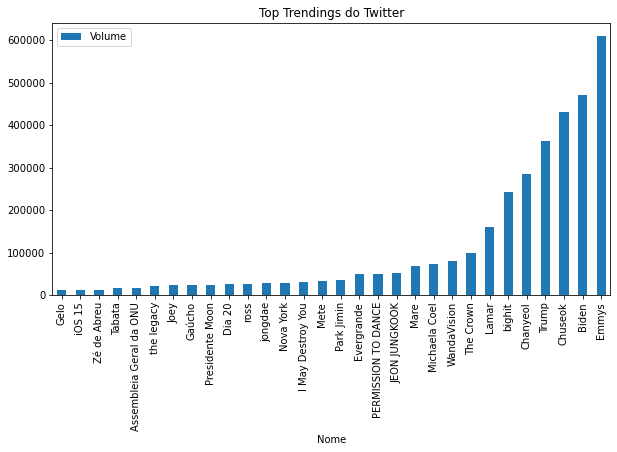

In [15]:
# Volume acima de 0
top = df_trends[df_trends["Volume"] > 0].sort_values("Volume")
top.plot(x="Nome", y=["Volume"], kind="bar", figsize=(10,5))
plt.title('Top Trendings do Twitter')

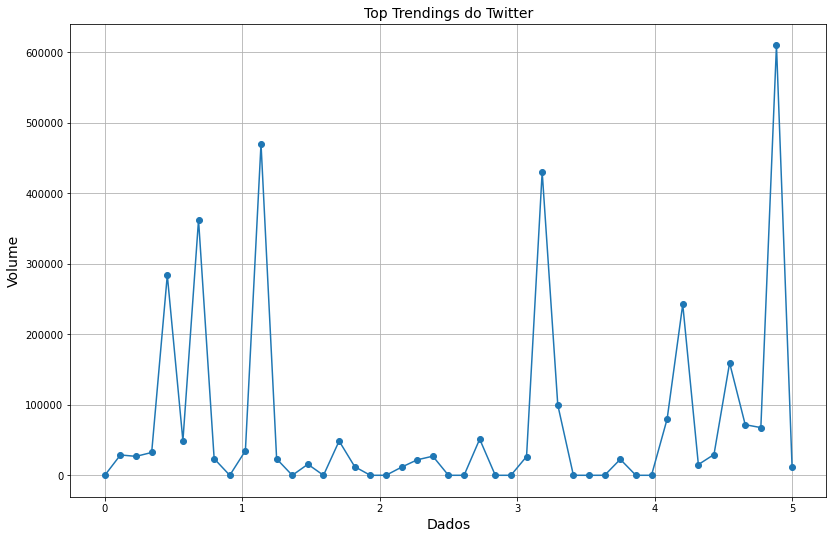

In [16]:
x = np.linspace(0.0, 5.0, 45)
fig, ax = plt.subplots(figsize=(15, 9))
fig.subplots_adjust(bottom=0.15, left=0.2)
plt.plot(x, df_trends["Volume"], marker='o')
plt.title('Top Trendings do Twitter', fontsize=14)
plt.xlabel('Dados', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Nome'>

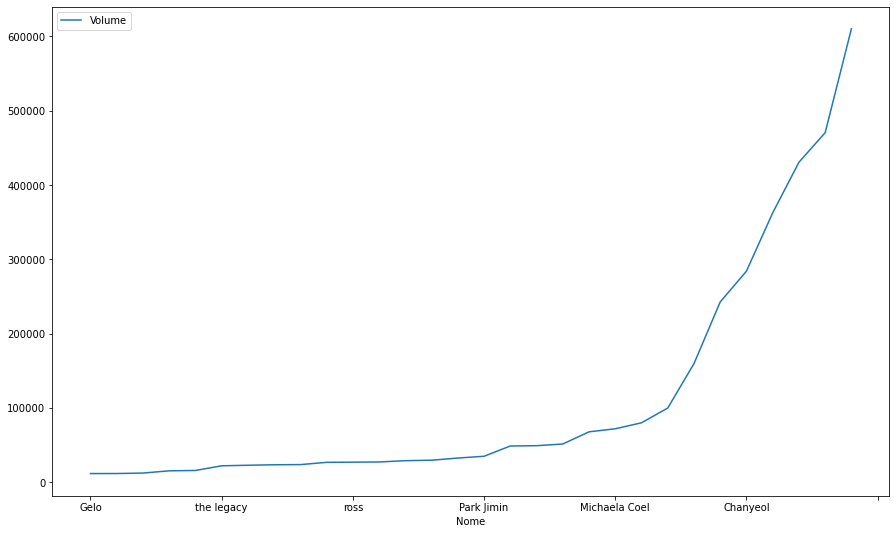

In [17]:
top = df_trends[df_trends["Volume"] > 0].sort_values("Volume")
top.plot(x="Nome", y="Volume", kind='line', figsize=(15,9))

## Funcionalidade 4: Análise de Sentimento
1. Usar o tweepy para obter os tweets.
2. Usar o textblob para analisar os tweets, afim de encontrar sentimentos.
3. Usar a lista de trends obtida na funcionalidade três para servir como paramêtro na função que obtem os tweets.

### Twitter Client

In [18]:
twitter_client = tc.TwitterClient()

### Análise Usando o Dataframe
Para ser realizado a análise de sentimento nos tweets, o laço `for` e a função `iterrows()` do `Dataframe` permite percorrer as linhas do `Dataframe` e através disso, selecionar uma coluna, neste caso a coluna `Nome`, mas pode ser também a coluna `Hashtag` pois no `json` obtido da *request* feita na **Twitter Api** essa coluna se chamava `query`. Pois bem, todos os tweets pegos usando a `query` escolhida são guardadas em uma lista para serem analisadas usando a biblioteca Textblob, se há sentimentos positivos, neutros ou negativos. Descorberto, os sentimentos é feito o calculo para descobrir a porcentagem de tweets que esse sentimento possui.

Além de claro, retornar os tweets ao final.

Fontes: [Twitter Sentiment Analysis using Python](https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/) e [How to iterate over rows in a DataFrame in Pandas](https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas)

In [24]:
for index, row in df_trends.iterrows():
    print("-----------------------------------------------------------------------------------------------------------------")
    print("O que está sendo comentado no top trendings: " + row['Nome'])
    tweets = twitter_client.get_tweets(query = row['Hashtag'], count = 200)
    
    positive_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positivo']
    
    print("Porcentagem de tweets positivos: {} %".format(100*len(positive_tweets)/len(tweets)))
    
    negatives_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negativo']
    
    print("Porcentagem de tweets negativos: {} %".format(100*len(negatives_tweets)/len(tweets)))
    
    print("Porcentagem de tweets neutros: {} % \
        ".format(100*(len(tweets) -(len( negatives_tweets )+len( positive_tweets)))/len(tweets)))
    
    print("\n\nTweets positivos:")
    for tweet in positive_tweets[:10]:
        print(tweet['text'])
        
    print("\n\nTweets negativos:")
    for tweet in negatives_tweets[:10]:
        print(tweet['text'])
    print("---------------------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------------------
O que está sendo comentado no top trendings: Pabllo Vittar
Porcentagem de tweets positivos: 3.125 %
Porcentagem de tweets negativos: 0.0 %
Porcentagem de tweets neutros: 96.875 %         


Tweets positivos:
a Pabllo Vittar assim hoje quando der 17h faz live mami @pabllovittar pra gente ver vc passando mal

https://t.co/DyaOEeBWag


Tweets negativos:
-------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------
O que está sendo comentado no top trendings: Nova York
Porcentagem de tweets positivos: 0.0 %
Porcentagem de tweets negativos: 2.2222222222222223 %
Porcentagem de tweets neutros: 97.77777777777777 %         


Tweets positivos:


Tweets negativos:
RT @carteiroreaca: Fake News! Se a notícia de que Bolso

Porcentagem de tweets positivos: 7.6923076923076925 %
Porcentagem de tweets negativos: 7.6923076923076925 %
Porcentagem de tweets neutros: 84.61538461538461 %         


Tweets positivos:
RT @TETEXGIRL: Al parecer está será el orden de apertura del 2o ODS 

 → Discurso de apertura del Secretario General de la ONU y el Preside…
RT @ddaengswan: La cuenta que traduce de KR a ENG, menciono que el orden es el siguiente:

— Discurso de apertura del secretario General de…
RT @BTSNewsBrasil: 📰De acordo com a programação divulgada pela Casa Azul, é dito que o presidente Moon fará seu discurso da AGNU por volta…


Tweets negativos:
RT @BTSNewsBrasil: 📍 SDG Moment  | Cronograma

• Discurso de abertura do Secretário-Geral da ONU
• Discurso de abertura do Presidente da As…
RT @Univers_Bangtan: Assembleia Geral da ONU - Ordem do Moment SDG #UNGA

 - Discurso de abertura do Secretário-Geral da ONU
 - Presidente…
RT @Qg_Barmys: 🔮 SDG Moment | Cronograma: 
 • Discurso de abertura do Secretário-Geral da

Porcentagem de tweets positivos: 0.0 %
Porcentagem de tweets negativos: 1.3888888888888888 %
Porcentagem de tweets neutros: 98.61111111111111 %         


Tweets positivos:


Tweets negativos:
#OURPRIDEBTS #Got_ARMY_Behind_Us  #BTSatUNGA 
Amo meus meninos vacinados, lindinhos  e maravilhosos na ONU
-------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------
O que está sendo comentado no top trendings: Assembleia Geral da ONU
Porcentagem de tweets positivos: 9.090909090909092 %
Porcentagem de tweets negativos: 0.0 %
Porcentagem de tweets neutros: 90.9090909090909 %         


Tweets positivos:
RT @taelovelyboy: "estamos no momento ideal de nossas vidas para enfrentar novos desafios. não era como se você pudesse culpar ninguém. voc…
RT @Univers_Bangtan: 📰 O BTS fará seu terceiro discurso na ONU como enviado presidencial 

Porcentagem de tweets positivos: 28.78787878787879 %
Porcentagem de tweets negativos: 3.0303030303030303 %
Porcentagem de tweets neutros: 68.18181818181819 %         


Tweets positivos:
For this one reason in particular we stood with #ZAB then #SMBB then #YRG - only #PPP has this to their credit. A p… https://t.co/Mm2yUV2OV8
RT @Suchisri2: Gazing at the sky getting the glimpses of one's faces.. A gorgeous man looked right at us gave us a broad smile, gave us the…
RT @instandaF2X: Discover the three steps to seamlessly integrate #insurtech and meet your IT department’s goals:
1️⃣ Plan before pitching…
This might just be a me a thing but taking business lessons from the legacy of a Nazi is not the best look. Assembl… https://t.co/Od60DkTrYe
25 Years After Its Release, Examining The Legacy Of 'Buena Vista Social Club' https://t.co/KVnDhePySA
@rrichwilliamss So amazing to see the legacy of this event continued. For all the newbies I along w other female ca… https://t.co/pvfypLF61i
RT @jan

Porcentagem de tweets positivos: 7.407407407407407 %
Porcentagem de tweets negativos: 3.7037037037037037 %
Porcentagem de tweets neutros: 88.88888888888889 %         


Tweets positivos:
ou gente, TDAH é mto sério real! eu sofro com a memória péssima até pra tomar meu próprio remédio para o TDAH HAHAH… https://t.co/fEBj3KY2dM
RT @gugaoshow: Sobre essa "polêmica" aí do TDAH eu só acho curioso que o TDAH não é tratado como uma condição de saúde

É super banalizado…
@mxgalhaes Exatamente o meu caso só que ao invés de tdah, comigo é fobia social
mano eu to me indentificando com a matéria do fantástico sobre TDAH, eu jurava q era normal?????


Tweets negativos:
RT @TriboTDAH: TDAH é um transtorno mental que tem uma das causas principais as alterações de processos bioquímicos do neurotransmissor dop…
RT @lamethodeFC: [RDV 16h !] TDAH (Trouble Déficit de l'Attention / Hyperactivité) : quelles sont les caractéristiques de ce trouble ? Quel…
-----------------------------------------------------

Porcentagem de tweets positivos: 0.0 %
Porcentagem de tweets negativos: 0.0 %
Porcentagem de tweets neutros: 100.0 %         


Tweets positivos:


Tweets negativos:
-------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------
O que está sendo comentado no top trendings: Joey
Porcentagem de tweets positivos: 26.5625 %
Porcentagem de tweets negativos: 6.25 %
Porcentagem de tweets neutros: 67.1875 %         


Tweets positivos:
RT @Helllo_its_me: Joey doesn't share food but Rachel does and they are Ross and Rachel for me

WE LOVE SHARA https://t.co/q4pHDq7czn
@slipknot @RiotFest Who are they using to replace Joey now? Man that dude was good. I still got his drumsticks
@JoeyIckes You keep it real Joey. Between you and @KDDrummondNFL, I learn enough to keep myself grounded over Dallas’ chances.
Joey Badass 1999 is really a 

Porcentagem de tweets positivos: 1.408450704225352 %
Porcentagem de tweets negativos: 0.0 %
Porcentagem de tweets neutros: 98.59154929577464 %         


Tweets positivos:
@anamariabsb @Erika_Valla13 @AkaFigliollo É normal então mulheres da esquerda se posicionarem a favor da misoginia… https://t.co/JmgFi8Kfs0


Tweets negativos:
-------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------
O que está sendo comentado no top trendings: I May Destroy You
Porcentagem de tweets positivos: 51.21951219512195 %
Porcentagem de tweets negativos: 39.02439024390244 %
Porcentagem de tweets neutros: 9.75609756097561 %         


Tweets positivos:
RT @nytimes: Michaela Coel has made history as the first Black woman to win at the #Emmys for limited series writing. It is her first Emmy…
RT @DionneGrant: "I dedicate this story to every s

Porcentagem de tweets positivos: 19.10112359550562 %
Porcentagem de tweets negativos: 6.741573033707865 %
Porcentagem de tweets neutros: 74.15730337078652 %         


Tweets positivos:
RT @FilmUpdates: Most wins at the 2021 #Emmys:

The Crown – 11
The Queen's Gambit — 11
Saturday Night Live — 8
Ted Lasso – 7
The Mandaloria…
RT @iambettertelle: Mare ano gusto mo Kotse Bahay ano ba gusto mo ? Haha Pare Christmas gift lang tinatanong ibang klase option mo for her…
RT @TelevisionAcad: Case closed! Congrats to Evan Peters, who wins the #Emmy for Outstanding Supporting Actor In A Limited Or Anthology Ser…
RT @MarkdaveyMark: Summer solstice - what a great time to start reading the She-Hag series! Check out my book 'She-Hag and the Night Mare L…
Also, the shows that won are good but INCREDIBLY white. Nobody is darker than a bowl of milk on Crown or Mare. Lass… https://t.co/pHHywVND1T
Mare of Eastown é uma série tão insossa, gente. Tudo muito ok sabe? E aquele final, pra que ela fez aquilo? Me